In this lecture we will discuss the concept of threading and related applications in ETL using Python. 

To introduce the concept of multithreading, let’s look at an example situation. Say you want to schedule some code to run after a delay or at a specific time. You could add code like the following at the start of your program:

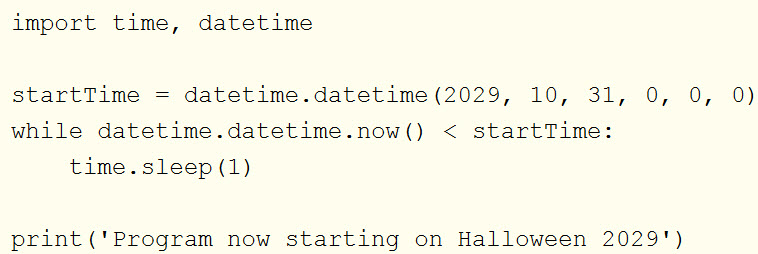

In [2]:
import time
import os
os.chdir("C:\\Users\\GAO\\Anaconda\\Gao_Jupyter_Notebook_Python_Codes\\Automate the Boring Stuff with Python\\Datasets and Files")
from IPython.display import Image
Image("ch16_snapshot_1.jpg") 

This code designates a start time of October 31, 2029, and keeps calling time.sleep(1) until the start time arrives. Your program cannot do anything while waiting for the loop of time.sleep() calls to finish; it just sits around until Halloween 2029. This is because Python programs by default have a single thread of execution.

A single-threaded program has only one finger. But a multithreaded program has multiple fingers. Each finger still moves to the next line of code as defined by the flow control statements, but the fingers can be at different places in the program, executing different lines of code at the same time (all of the programs in this book so far have been single threaded). 

Rather than having all of your code wait until the time.sleep() function finishes, you can execute the delayed or scheduled code in a separate thread using Python’s threading module. The separate thread will pause for the time.sleep calls. Meanwhile, your program can do other work in the original thread. To make a separate thread, you first need to make a 'Thread' object by calling the threading.Thread() function:

In [5]:
import threading, time
print('Start of program')
def takeANap():
    time.sleep(5)
    print('Wake up!')
threadObj = threading.Thread(target=takeANap)
threadObj.start()
print('End of program')

Start of program
End of program
Wake up!


Here, we define a function that we want to use in a new thread. To create a 'Thread' object, we call threading.Thread() and pass it the keyword argument 'target=takeANap'. This means the function we want to call in the new thread is takeANap(). Notice that the keyword argument is 'target=takeANap', not 'target=takeANap()'. This is because you want to pass the takeANap() function itself as the argument, not call takeANap() and pass its return value.

After we store the 'Thread object' created by threading.Thread() in 'threadObj', we call threadObj.start() to create the new thread and start executing the target function in the new thread. When this program is run, the order of the output will look like this: "Start of a program...End of program...Wake up!" This can be a bit confusing. If print('End of program') is the last line of the program, you might think that it should be the last thing printed. The reason 'Wake up!' comes after it is that when threadObj.start() is called, the target function for 'threadObj' is run in a new thread of execution. Think of it as a second finger appearing at the start of the takeANap() function. The main thread continues to print('End of program'). Meanwhile, the new thread that has been executing the time.sleep(5) call, pauses for 5 seconds. After it wakes from its 5-second nap, it prints 'Wake up!' and then returns from the takeANap() function. Chronologically, 'Wake up!' is the last thing printed by the program.

Normally a program terminates when the last line of code in the file has run (or the sys.exit() function is called). But the program above has two threads. The first is the original thread that began at the start of the program and ends after print('End of program'). The second thread is created when threadObj.start() is called, begins at the start of the takeANap() function, and ends after takeANap() returns. A Python program will not terminate until all its threads have terminated.

Now let's see a different example. Suppose the target function you want to run in the new thread takes arguments, you can pass the target function’s arguments to threading.Thread(). For example, say you wanted to run this print() call in its own thread: print('Cats', 'Dogs', 'Frogs', sep=' & ').  This print() call has three regular arguments, 'Cats', 'Dogs', and 'Frogs', and one keyword argument, sep=' & '. The regular arguments can be passed as a list to the args keyword argument in threading.Thread(). The keyword argument can be specified as a dictionary to the kwargs keyword argument in threading.Thread(), see below:

In [6]:
threadObj = threading.Thread(target=print, args=['Cats', 'Dogs', 'Frogs'], kwargs={'sep': ' & '})
threadObj.start()

Cats & Dogs & Frogs


To make sure the arguments 'Cats', 'Dogs', and 'Frogs' get passed to print() in the new thread, we pass args=['Cats', 'Dogs', 'Frogs'] to threading.Thread(). To make sure the keyword argument sep=' & ' gets passed to print() in the new thread, we pass kwargs={'sep': '& '} to threading.Thread(). The threadObj.start() call will create a new thread to call the print() function, and it will pass 'Cats', 'Dogs', and 'Frogs' as arguments and ' & ' for the 'sep' keyword argument.

The incorrect way of doing this is the following: threadObj = threading.Thread(target=print('Cats', 'Dogs', 'Frogs', sep=' & ')). What this ends up doing is calling the print() function and passing its return value (print()’s return value is always None) as the target keyword argument. It doesn’t pass the print() function itself. The lesson here is that when passing arguments to a function in a new thread, we should always use the threading.Thread() function’s args and kwargs keyword arguments.

In conclusion, you can easily create several new threads and have them all running at the same time. But multiple threads can also cause problems called concurrency issues. These issues happen when threads read and write variables at the same time, causing the threads to trip over each other. Concurrency issues can be hard to reproduce consistently, making them hard to debug.

Multithreaded programming is its own wide subject and beyond the scope of this lecture. What you have to keep in mind is this: to avoid concurrency issues, never let multiple threads read or write the same variables. When you create a new 'Thread' object, make sure its target function uses only local variables in that function. This will avoid hard-to-debug concurrency issues in your programs.